In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('shopping_motivations_in_china.csv')

In [3]:
df.head()

,ID,Gender,Age,Edu,Inc,Emp,Monthly_Spend,Retail_Platform,Adv,Soc,Grat,Ide,Rol,Val,Eff,Ach,MAH_1,filter_$,Spend,Occupation
0,200,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.333333,3.50,3.0,3.0,4.00,3.25,4.0,4.333333,0.697290,1.0,2.0,3.0
1,270,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.333333,3.25,3.0,3.0,3.25,3.00,3.5,3.666667,0.758954,1.0,2.0,4.0
2,302,1.0,1.0,2.0,2.0,4.0,1.0,0.0,3.666667,3.50,4.0,3.5,4.00,3.50,4.0,4.000000,0.771025,1.0,1.0,6.0
3,381,1.0,2.0,2.0,2.0,1.0,2.0,1.0,4.333333,3.75,4.0,3.5,4.00,3.50,3.5,4.000000,0.893513,1.0,2.0,3.0
4,64,2.0,2.0,2.0,2.0,1.0,2.0,0.0,4.000000,3.25,4.0,3.0,4.00,3.00,3.5,4.333333,0.895807,1.0,2.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               403 non-null    int64  
 1   Gender           403 non-null    float64
 2   Age              393 non-null    float64
 3   Edu              401 non-null    float64
 4   Inc              403 non-null    float64
 5   Emp              380 non-null    float64
 6   Monthly_Spend    403 non-null    float64
 7   Retail_Platform  403 non-null    float64
 8   Adv              403 non-null    float64
 9   Soc              403 non-null    float64
 10  Grat             403 non-null    float64
 11  Ide              403 non-null    float64
 12  Rol              403 non-null    float64
 13  Val              403 non-null    float64
 14  Eff              403 non-null    float64
 15  Ach              403 non-null    float64
 16  MAH_1            403 non-null    float64
 17  filter_$        

¿Existe alguna agrupación natural entre los consumidores en función de las métricas hedónicas como : Adv, Soc, Grat, Ide, Rol, Val?

¿Qué factores (educación, ocupación, ingresos) determinan el predominio de compras utilitarias frente a hedónicas?

¿Existen diferencias significativas en el comportamiento de compra entre consumidores dentro y fuera del umbral de Mahalanobis?

In [5]:
df['Spend'].unique()

array([2., 1., 3.])

Preguntas:
    
¿Qué relación existe entre el tipo de plataforma utilizada (Retail_Platform) y el nivel de ingresos (Inc) a la hora de realizar compras?

¿Se pueden identificar segmentos de consumidores con comportamientos de gasto diferenciados basados en el gasto mensual (Monthly_Spend) y su nivel de ingresos (Inc)?

¿Existen diferencias significativas en las preferencias de compra (plataforma física o en línea) entre consumidores con distintos niveles de gasto (Spend) e ingresos (Inc)?

In [6]:
df.isnull().sum()

ID                  0
Gender              0
Age                10
Edu                 2
Inc                 0
Emp                23
Monthly_Spend       0
Retail_Platform     0
Adv                 0
Soc                 0
Grat                0
Ide                 0
Rol                 0
Val                 0
Eff                 0
Ach                 0
MAH_1               0
filter_$            0
Spend               0
Occupation         23
dtype: int64

In [7]:
df_null = df[df['Age'].isnull()]
df_null

,ID,Gender,Age,Edu,Inc,Emp,Monthly_Spend,Retail_Platform,Adv,Soc,Grat,Ide,Rol,Val,Eff,Ach,MAH_1,filter_$,Spend,Occupation
80,138,1.0,NaN,1.0,2.0,1.0,1.0,0.0,4.000000,3.00,3.333333,4.0,4.00,2.50,3.5,3.666667,3.148265,1.0,1.0,3.0
135,328,1.0,NaN,2.0,2.0,1.0,1.0,0.0,3.666667,3.75,3.000000,4.0,3.75,3.00,3.0,3.000000,4.433336,1.0,1.0,3.0
246,204,2.0,NaN,1.0,2.0,1.0,1.0,0.0,4.000000,3.75,2.666667,3.0,4.50,2.50,3.0,5.000000,7.686350,1.0,1.0,1.0
255,208,2.0,NaN,1.0,1.0,1.0,1.0,0.0,4.666667,3.25,3.000000,3.0,3.25,4.00,5.0,4.666667,8.330996,1.0,1.0,1.0
259,15,1.0,NaN,1.0,2.0,1.0,1.0,1.0,3.666667,3.50,2.666667,4.5,4.50,2.75,4.0,5.000000,8.418018,1.0,1.0,2.0
304,371,1.0,NaN,2.0,2.0,2.0,2.0,0.0,2.333333,3.75,2.000000,2.0,4.00,1.25,4.0,4.666667,10.826850,1.0,3.0,4.0
312,140,2.0,NaN,2.0,2.0,NaN,1.0,0.0,5.000000,3.00,4.000000,4.5,5.00,3.75,2.5,3.333333,11.494441,1.0,1.0,NaN
367,385,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.000000,1.00,1.000000,1.0,1.00,1.50,1.0,2.333333,16.604597,1.0,1.0,3.0
377,365,1.0,NaN,2.0,2.0,1.0,2.0,1.0,3.000000,3.75,1.000000,2.5,1.50,1.50,3.0,3.333333,18.222654,1.0,3.0,1.0
397,178,1.0,NaN,2.0,2.0,1.0,1.0,0.0,5.000000,3.00,1.000000,3.0,2.00,1.00,3.0,2.333333,28.860726,0.0,1.0,3.0


In [8]:
# Sustituir edades vacías con la mediana
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


In [9]:
# Eliminar los usuarios que tengan nulos
df = df.dropna()

In [10]:
# No quedan nulos
df.isnull().sum()

ID                 0
Gender             0
Age                0
Edu                0
Inc                0
Emp                0
Monthly_Spend      0
Retail_Platform    0
Adv                0
Soc                0
Grat               0
Ide                0
Rol                0
Val                0
Eff                0
Ach                0
MAH_1              0
filter_$           0
Spend              0
Occupation         0
dtype: int64

In [11]:
# filtrar para aplicar mahalanobis
df = df[df['filter_$'] == 1]

In [12]:
# Selección de Variables

# variables = ['Spend','Retail_Platform','Inc','Adv']
# variables = ['Spend','Soc','Adv']  #,'Inc'
# variables = ['Spend','Ide','Retail_Platform', 'Inc']
variables = ['Spend','Val','Retail_Platform', 'Inc'] # mejor
# variables = ['Spend','Val','Retail_Platform', 'Occupation']

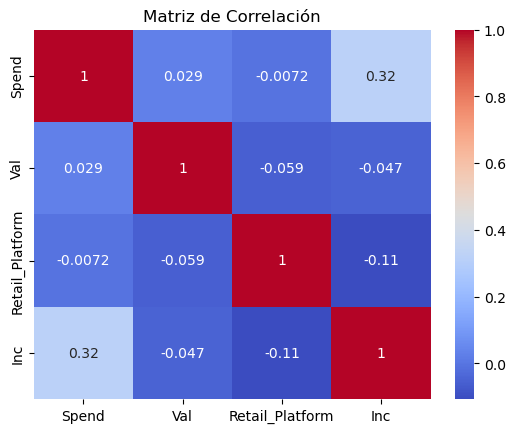

In [13]:
# Calcular la matriz de correlación

corr_matrix = df[variables].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

Se muestran correlaciones moderadas entre múltiples variables, las más destacadas son: Ide y Grat(0.61) o Adv y Grat(0.6). Por este motivo se optara por la realización del PCA.

In [14]:
# Escalar las variables seleccionadas para que tengan media 0 y desviación estándar 1.
# Esto es importante porque el PCA y los métodos basados en distancia (como K-Means) son sensibles a la escala de los datos.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[variables])

C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

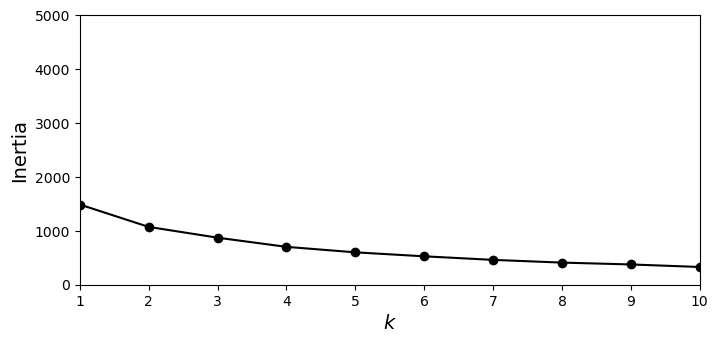

In [15]:
# Ajuste modelo ES EL DE PRUEBAS
kmeans_model_list = [KMeans(n_clusters=k, n_init=10, random_state=4).fit(x_scaled) for k in range(1, 20)]

# Cálculo de la inercia y visualización
inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "ko-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 0, 5000])
plt.show()


Se decide tomar k = 3  porque a partir de este punto la reducción de la inercia se va suavizando.

In [238]:
# Estaria bien tomar algun otro estadistico para tomar la decision como CALINSKY-HARABASZ

In [20]:
# Lista para almacenar los valores del índice de Calinski-Harabasz

from sklearn.metrics import calinski_harabasz_score

calinski_scores = []

# Rango de número de clusters a evaluar
for num_clusters in range(2, 11):
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
#     # Ajustar el modelo a los datos
    kmeans.fit(x_scaled)
    
    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_
    
    # Calcular el índice de Calinski-Harabasz
    score = calinski_harabasz_score(x_scaled, labels)
    calinski_scores.append(score)

# Encontrar el número de clusters que maximiza el índice
best_num_clusters = np.argmax(calinski_scores) + 2  # Sumamos 2 porque el rango empieza en 2

print("El número óptimo de clusters según el criterio de Calinski-Harabasz es:", best_num_clusters)

C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

El número óptimo de clusters según el criterio de Calinski-Harabasz es: 2


In [239]:
# 3- Generación del modelo con 3 clústeres y predicción de éste
# kmeans_complete = KMeans(n_clusters=5, n_init=10,random_state = 0).fit(x_pca)

In [21]:
kmeans_complete = KMeans(n_clusters=2
                         , n_init=10,random_state = 0).fit(x_scaled)

C:\Users\Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [22]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(x_scaled, kmeans_complete.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.294024637022163


El Silhouette Score es bajo estando alrededor de 0.25 

In [242]:
kmeans_complete.labels_

array([2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0,
       0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0,
       1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0,

In [243]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(x_scaled)
score = silhouette_score(x_scaled, labels)
print("Silhouette Score con Agglomerative:", score)

Silhouette Score con Agglomerative: 0.28217762112545514


In [244]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples= 30)
labels = dbscan.fit_predict(x_scaled)

# Solo calcular el score si hay más de 1 clúster
if len(set(labels)) > 1:
    score = silhouette_score(x_scaled, labels)
    print("Silhouette Score con DBSCAN:", score)
else:
    print("DBSCAN no encontró múltiples clústeres.")

Silhouette Score con DBSCAN: 0.131971350092546


In [245]:
for eps in [0.3, 0.5, 0.7]:
    dbscan = DBSCAN(eps=eps, min_samples=50)
    labels = dbscan.fit_predict(x_scaled)
    if len(set(labels)) > 1:
        score = silhouette_score(x_scaled, labels)
        print(f"Silhouette Score con eps={eps}: {score}")

In [246]:
# variables = ['Spend','Val','Retail_Platform', 'Inc'] VARIABLES UTILIZADAS

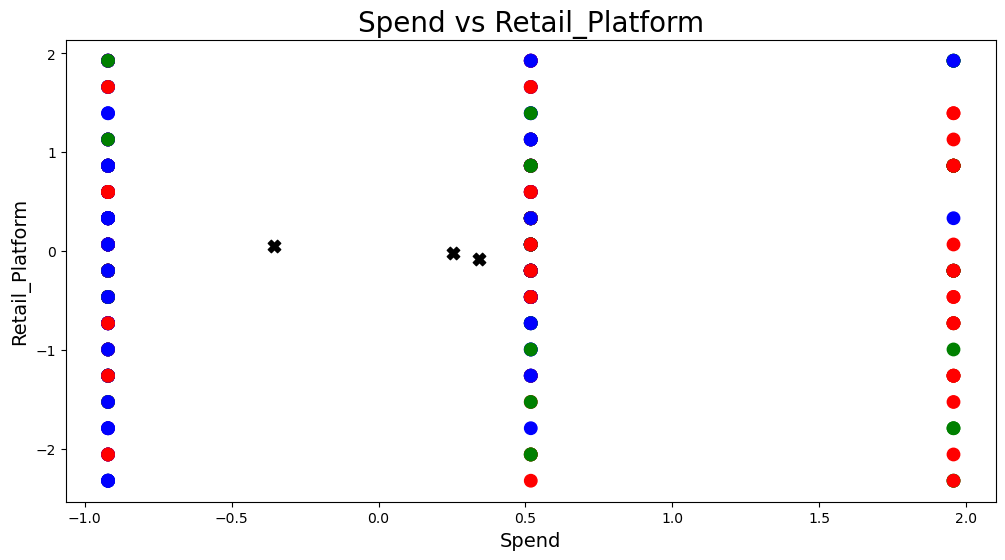

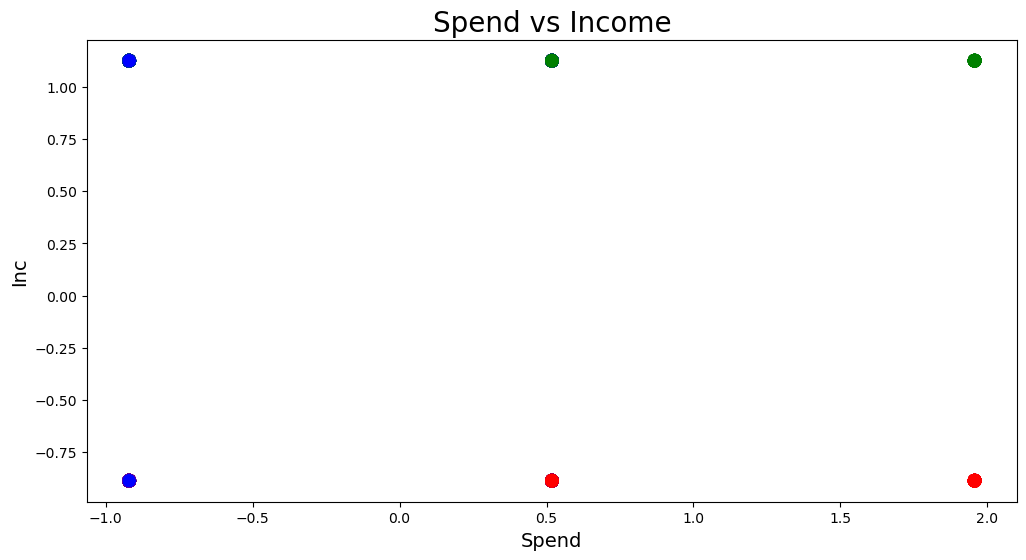

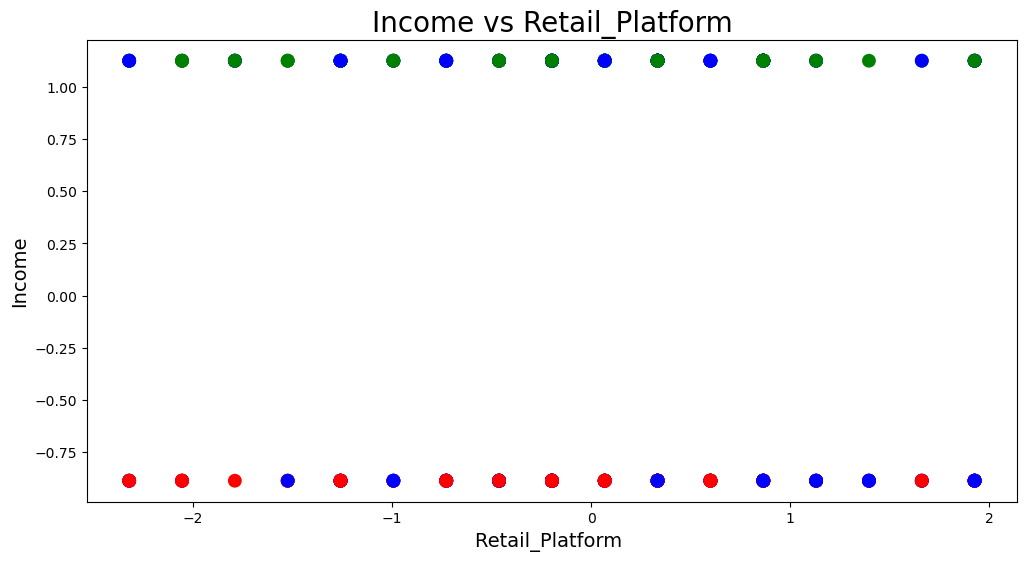

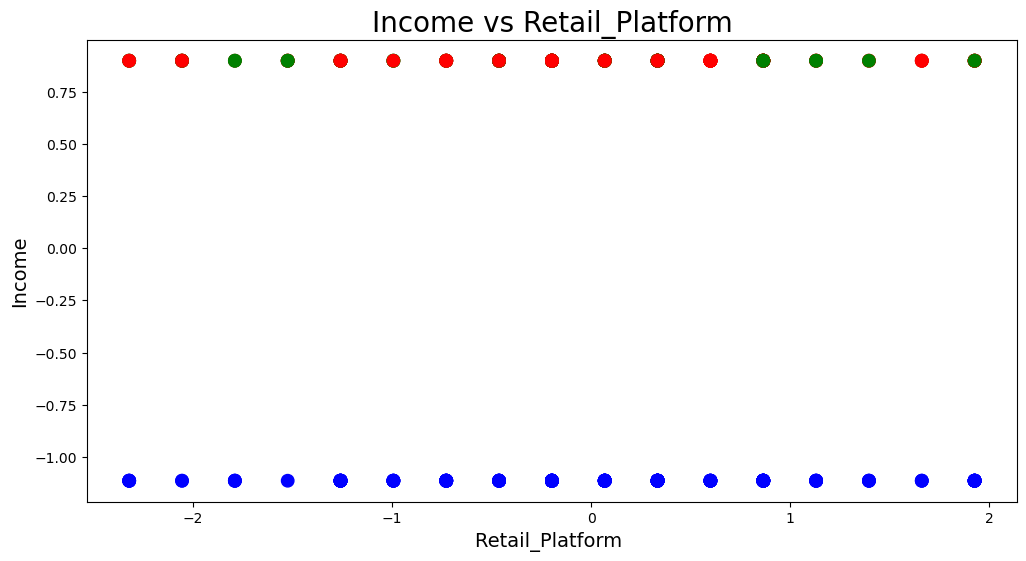

In [247]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols

cols_train = pltcolor(kmeans_complete.labels_)


plt.figure(figsize=(12, 6))
plt.title("Spend vs Retail_Platform", fontsize = 20)
# Etiquetas ejes horizontal y vertical
plt.xlabel("Spend", fontsize=14)
plt.ylabel("Retail_Platform", fontsize=14)

# Instancias de entrenamiento
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=cols_train, marker = "o", s = 80)

# Centroides
centroids = kmeans_complete.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', marker = 'X')


## Segunda gráfica 
plt.figure(figsize=(12, 6))
plt.title("Spend vs Income", fontsize = 20)
plt.xlabel("Spend", fontsize=14)
plt.ylabel("Inc", fontsize=14)
plt.scatter(x_scaled[:,0], x_scaled[:,2], c=cols_train, marker = "o", s = 80)

## Tercera gráfica 
plt.figure(figsize=(12, 6))
plt.title("Income vs Retail_Platform", fontsize = 20)
plt.xlabel("Retail_Platform ", fontsize=14)
plt.ylabel("Income", fontsize=14)

plt.scatter(x_scaled[:,1], x_scaled[:,2], c=cols_train, marker = "o", s = 80)

## Cuarta gráfica(titulo no est bien en este)
plt.figure(figsize=(12, 6))
plt.title("Income vs Retail_Platform", fontsize = 20)
plt.xlabel("Retail_Platform ", fontsize=14)
plt.ylabel("Income", fontsize=14)

plt.scatter(x_scaled[:,1], x_scaled[:,3], c=cols_train, marker = "o", s = 80)

In [ ]:
# variables = ['Spend', 'Adv', 'Soc','Ide', 'Eff']

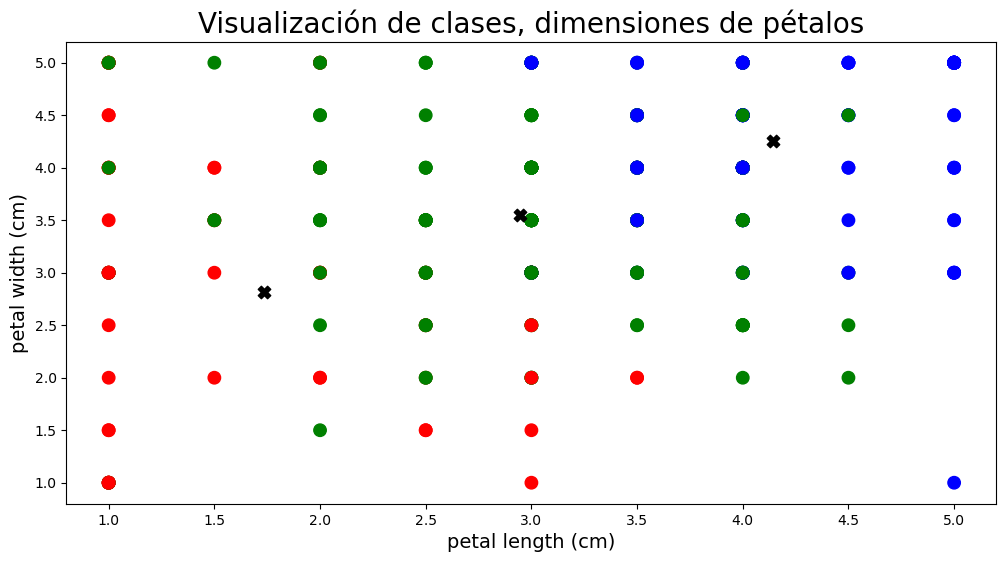

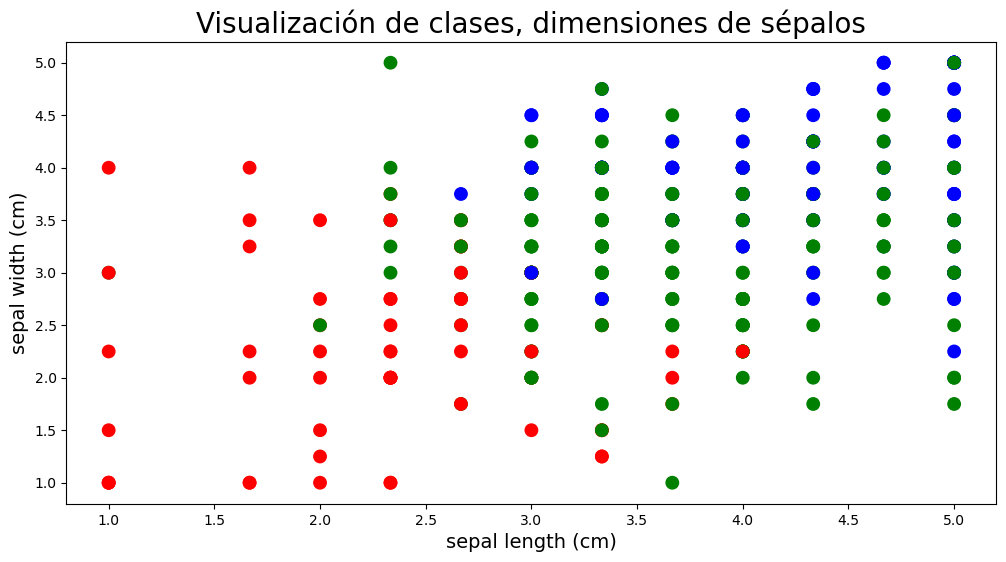

In [19]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
        else:
            cols.append('green')
    return cols

cols_train = pltcolor(kmeans_iris_complete.labels_)


plt.figure(figsize=(12, 6))
plt.title("Visualización de clases, dimensiones de pétalos", fontsize = 20)
# Etiquetas ejes horizontal y vertical
plt.xlabel("petal length (cm)", fontsize=14)
plt.ylabel("petal width (cm)", fontsize=14)

# Instancias de entrenamiento
plt.scatter(data[:,3], data[:,4], c=cols_train, marker = "o", s = 80)

# Centroides
centroids = kmeans_iris_complete.cluster_centers_
plt.scatter(centroids[:,3] , centroids[:,4] , s = 80, color = 'k', marker = 'X')


## Segunda gráfica - sépalos
plt.figure(figsize=(12, 6))
plt.title("Visualización de clases, dimensiones de sépalos", fontsize = 20)
# Etiquetas ejes horizontal y vertical
plt.xlabel("sepal length (cm)", fontsize=14)
plt.ylabel("sepal width (cm)", fontsize=14)

# Instancias de entrenamiento
plt.scatter(data[:,1], data[:,2], c=cols_train, marker = "o", s = 80)

In [163]:
PENDIENTE PROBAR OTROS ALGORITMOS

SyntaxError: invalid syntax (2193167319.py, line 1)